In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Renaming Columns
df_train = df_train.rename(columns={'Province/State' : 'State', 'Country/Region' : 'Country'})
df_test = df_test.rename(columns={'Province/State' : 'State', 'Country/Region' : 'Country'})



In [ ]:
country = df_train['Country']
country_set = list(set(country))
country_set = sorted(country_set)

state = df_train['State']
for i in range(len(state)):
    if(pd.isnull(state[i])):
        state[i] = country[i]

state_set = list(set(state))

date = df_train['Date']

for i in range(len(date)):
    dt = date[i]
    mm = dt[5:7]
    dd = dt[8:10]
    mm= int(mm)
    dd = int(dd)
    if(mm==1):
        day = dd
    elif(mm==2):
        day = 31+dd
    elif(mm==3):
        day = 31+29+dd
    date[i] = day
    
date_set = sorted(list(set(date)))


confirm = df_train['ConfirmedCases']
fatal = df_train['Fatalities']

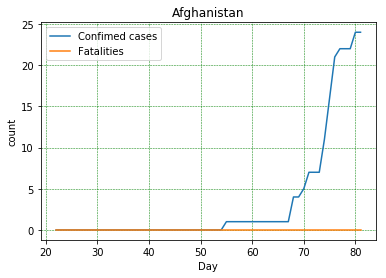

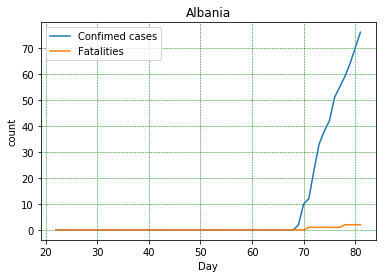

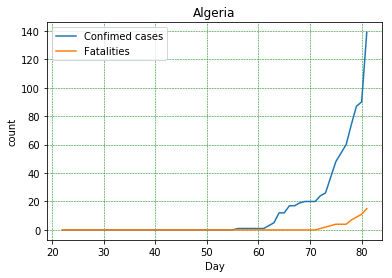

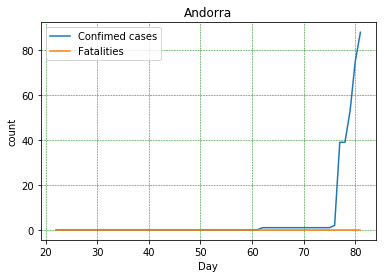

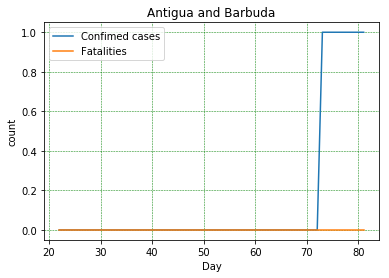

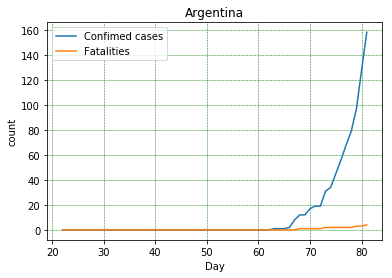

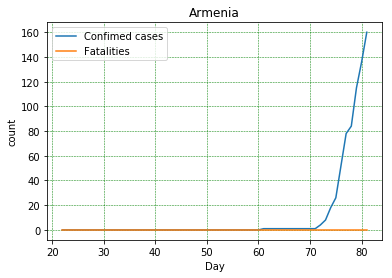

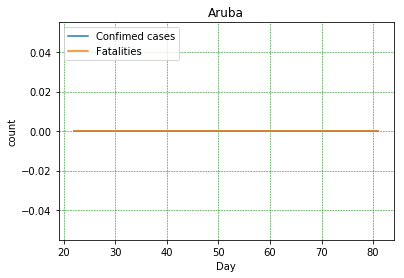

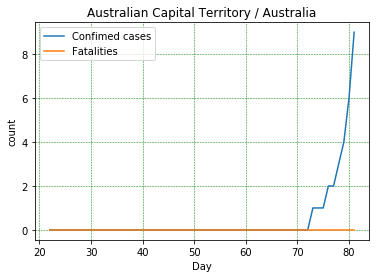

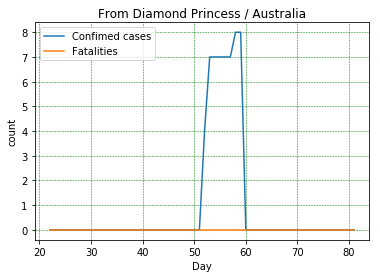

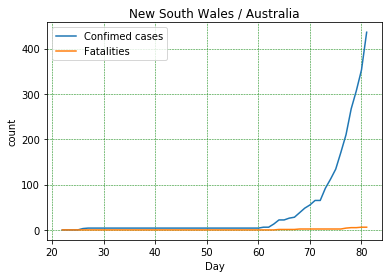

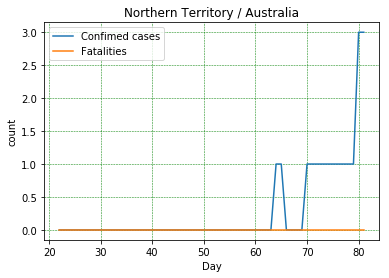

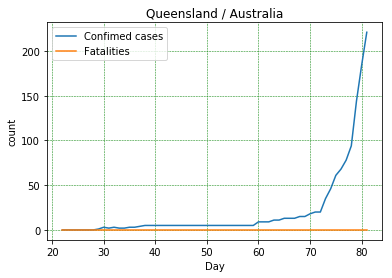

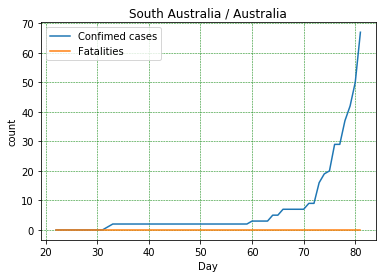

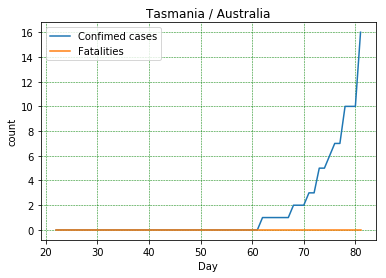

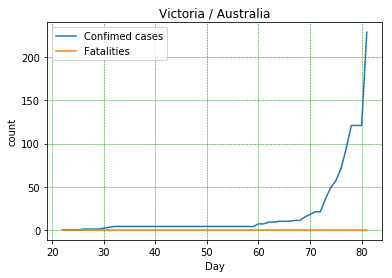

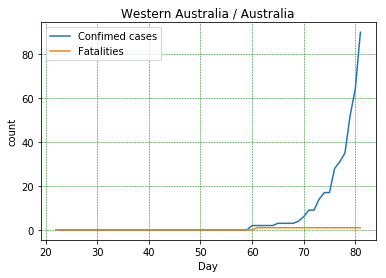

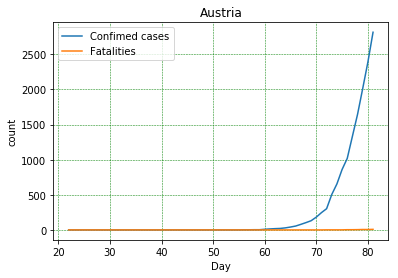

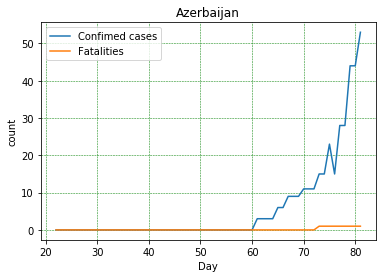

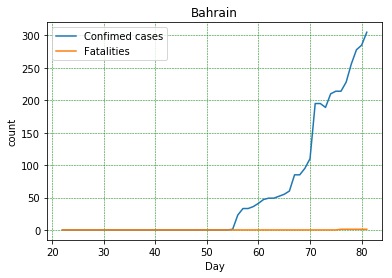

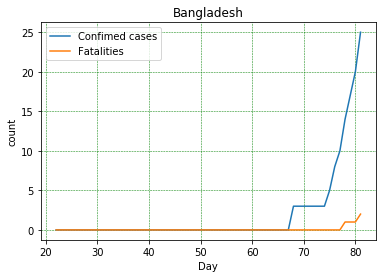

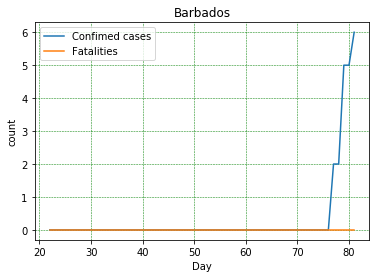

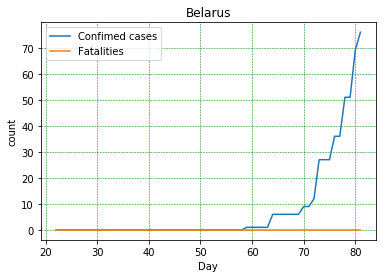

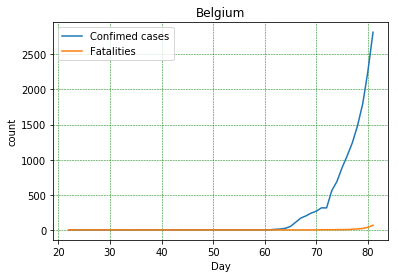

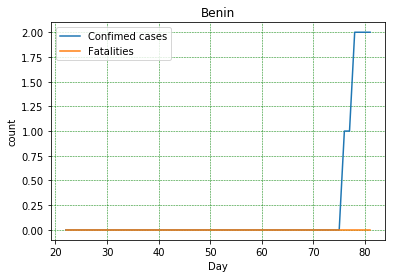

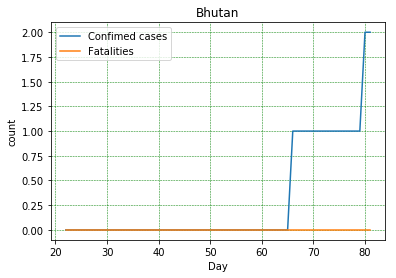

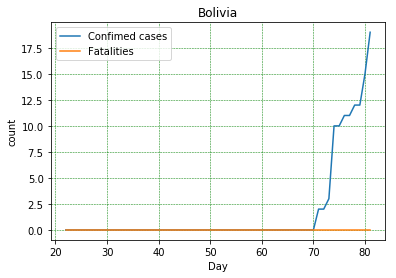

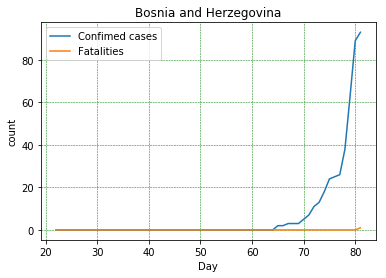

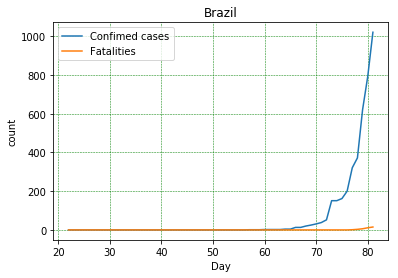

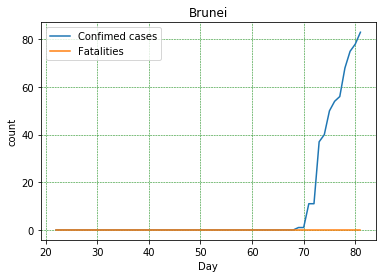

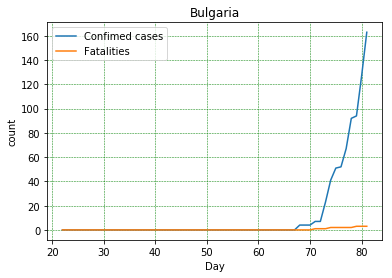

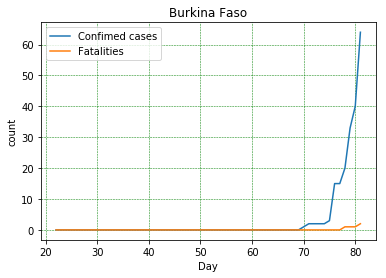

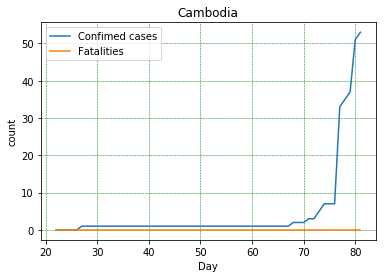

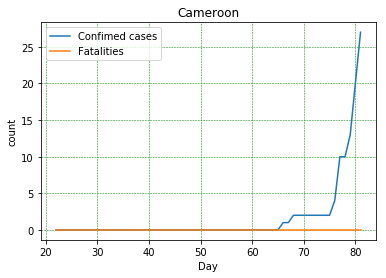

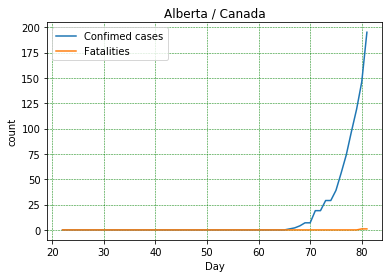

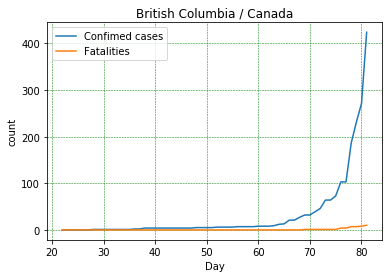

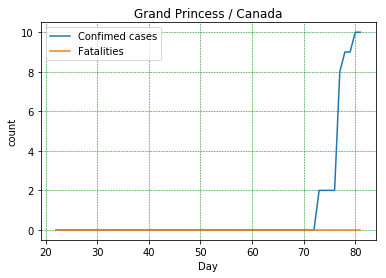

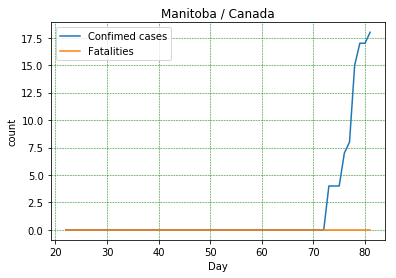

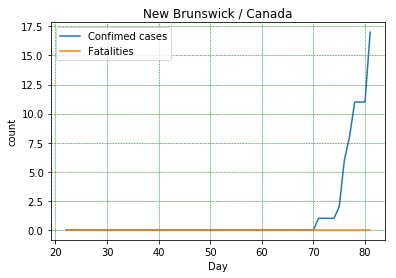

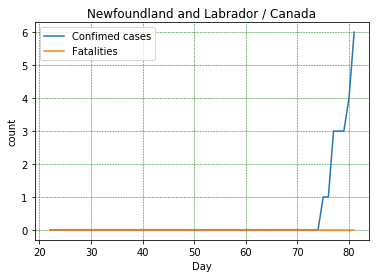

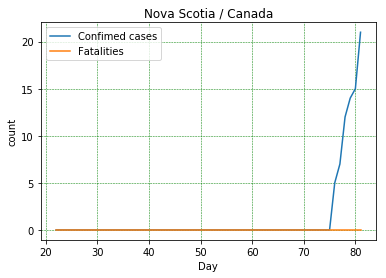

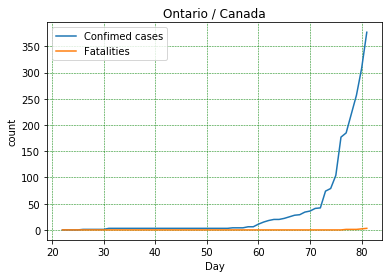

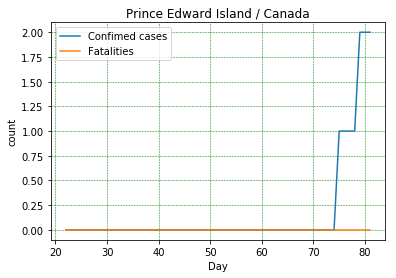

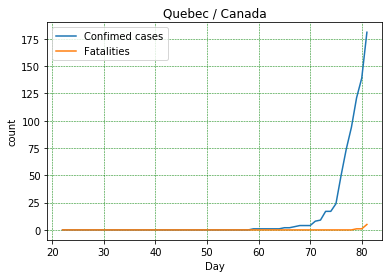

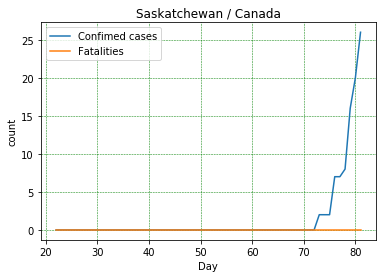

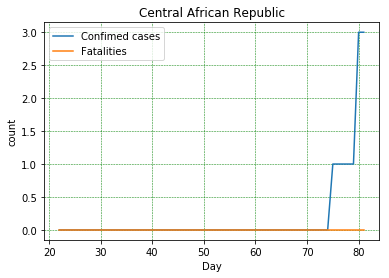

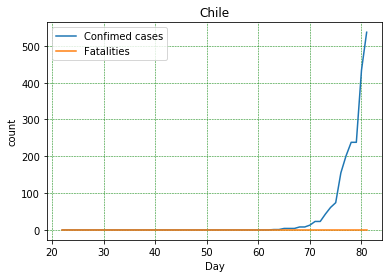

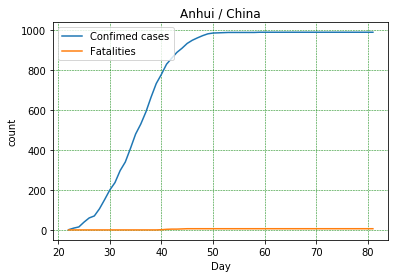

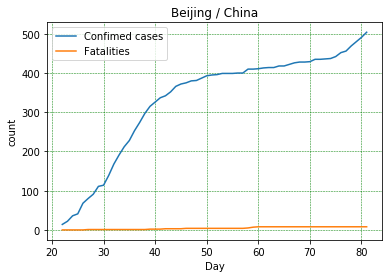

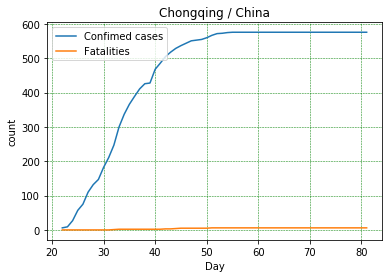

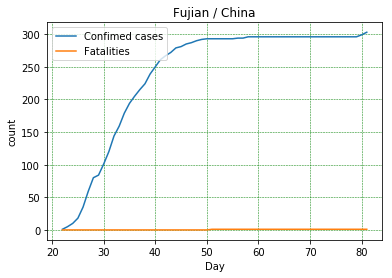

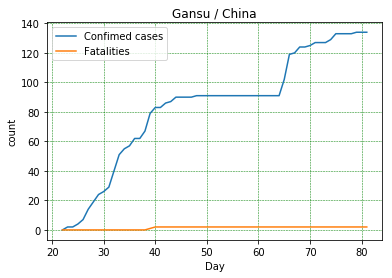

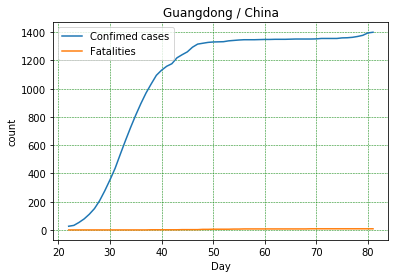

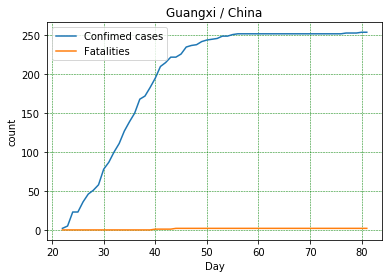

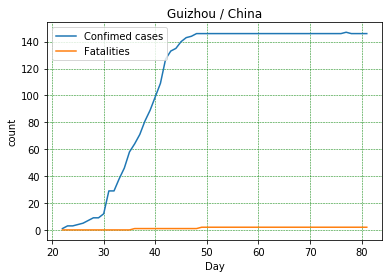

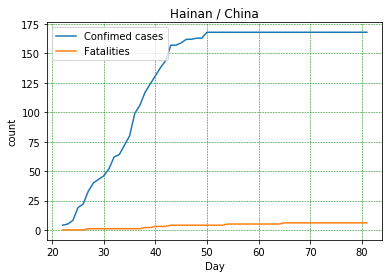

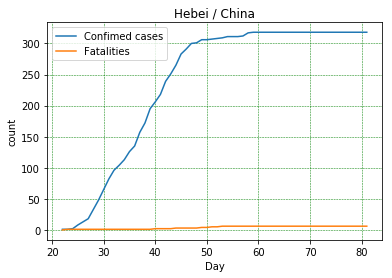

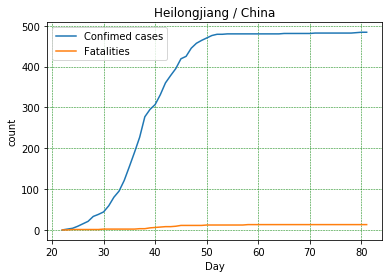

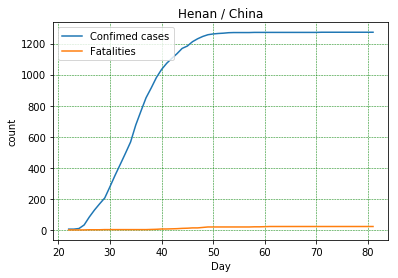

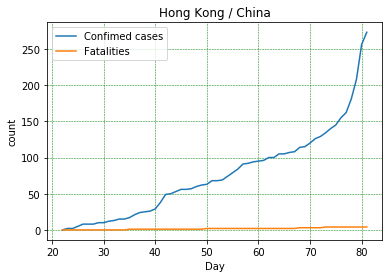

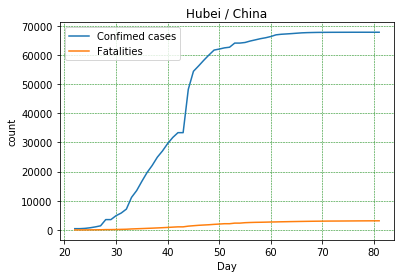

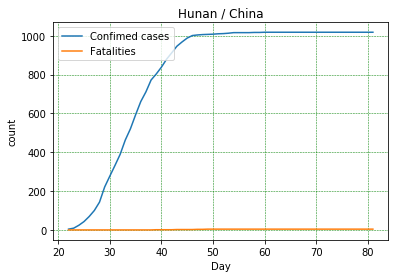

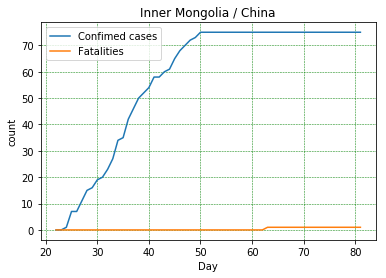

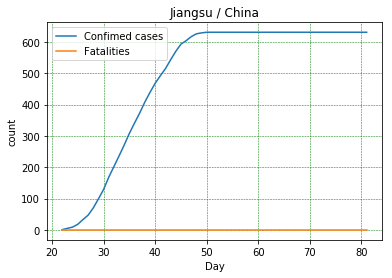

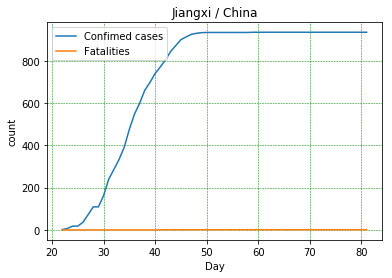

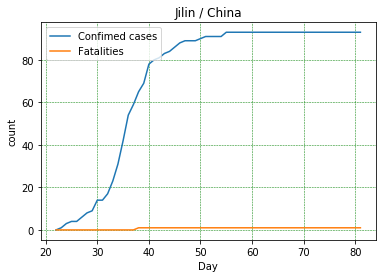

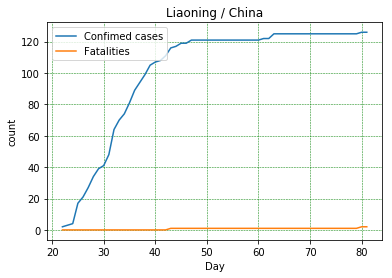

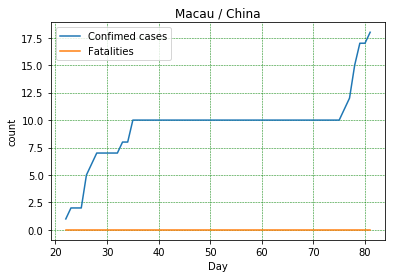

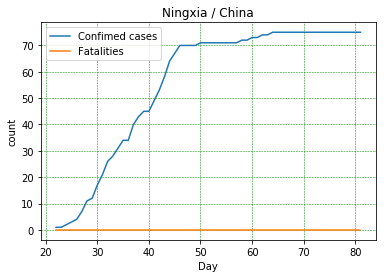

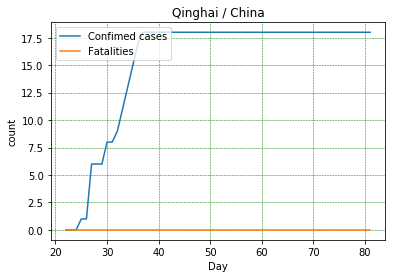

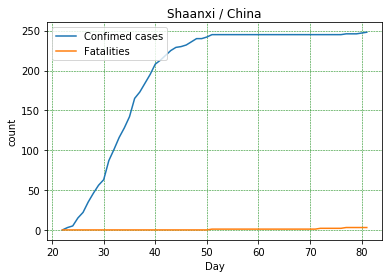

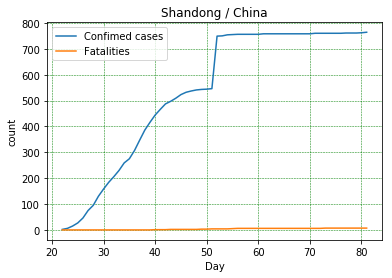

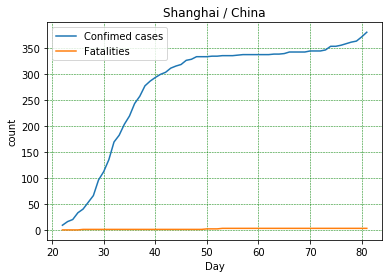

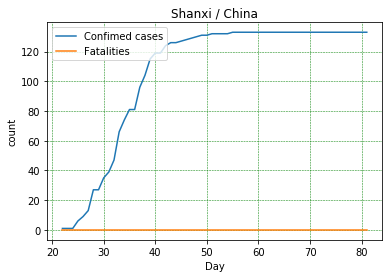

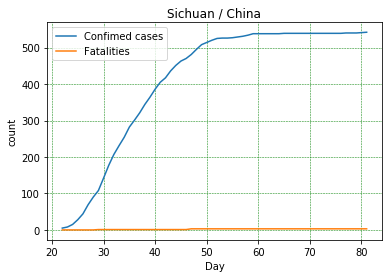

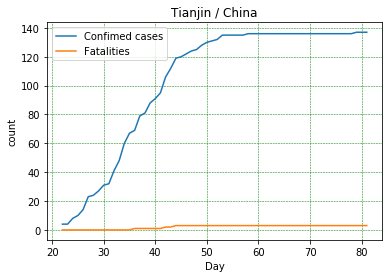

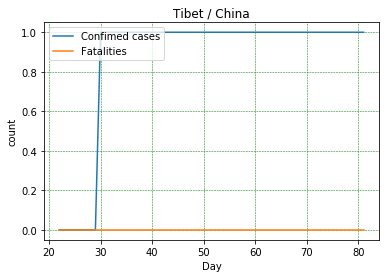

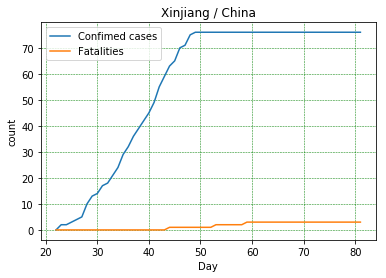

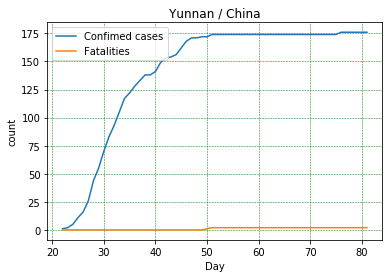

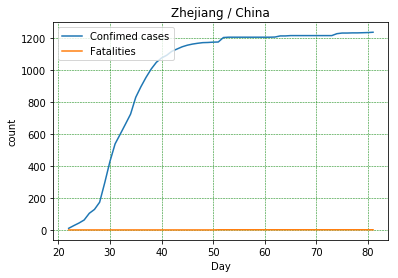

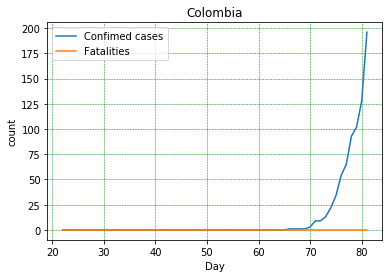

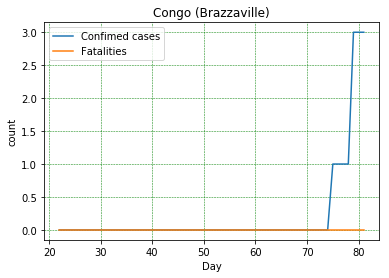

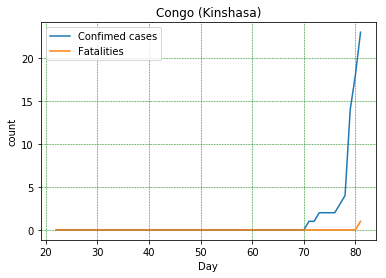

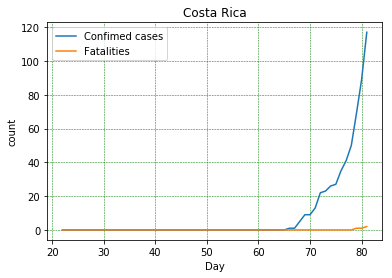

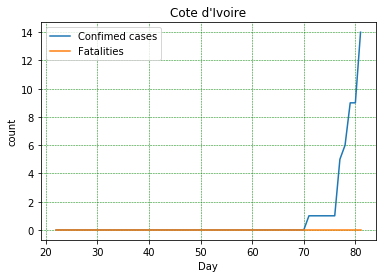

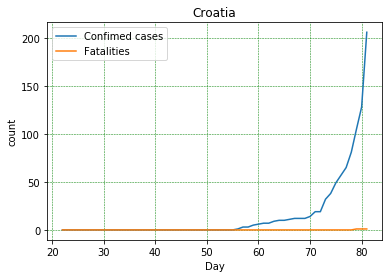

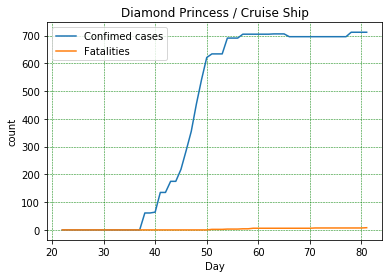

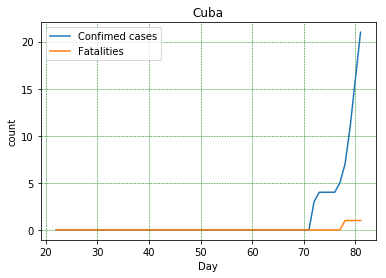

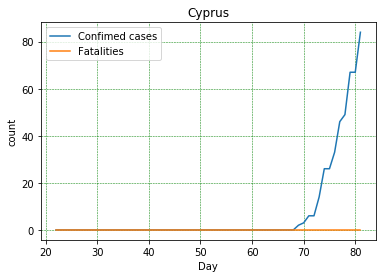

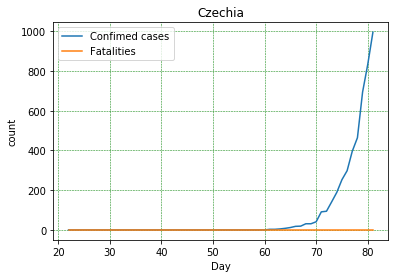

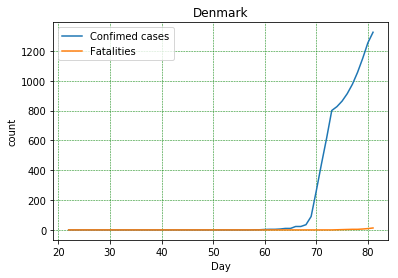

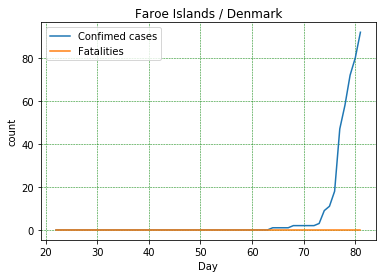

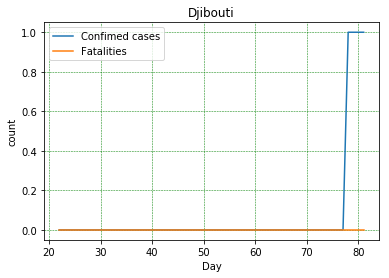

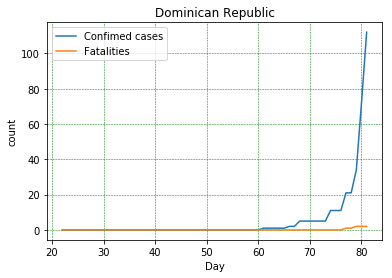

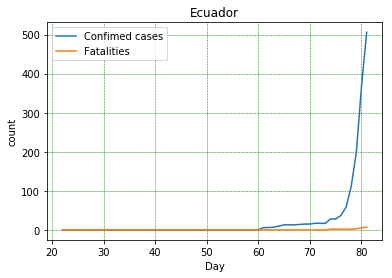

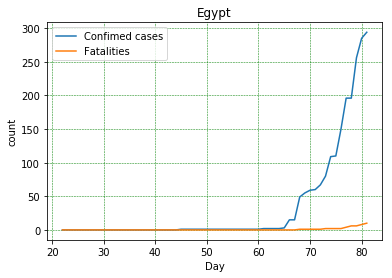

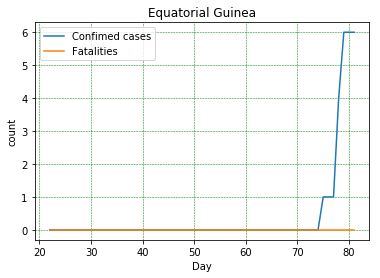

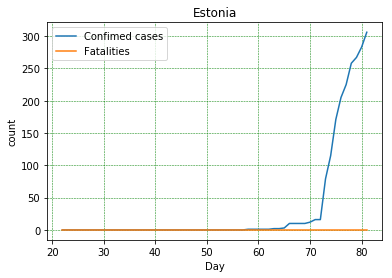

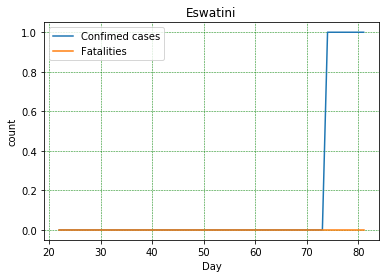

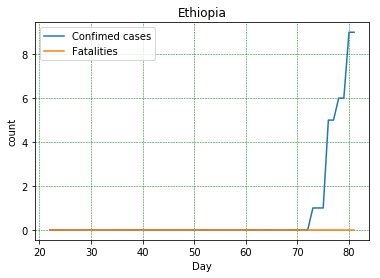

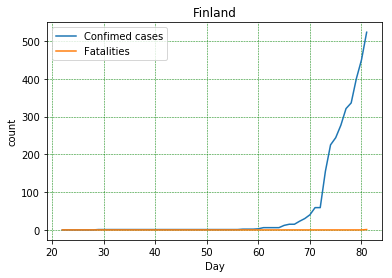

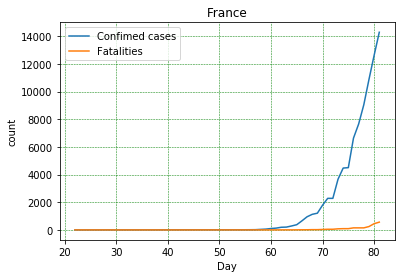

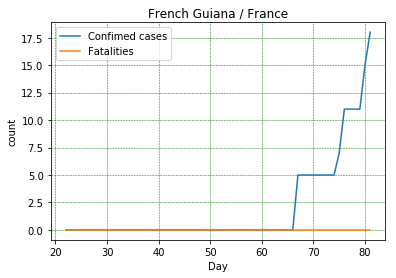

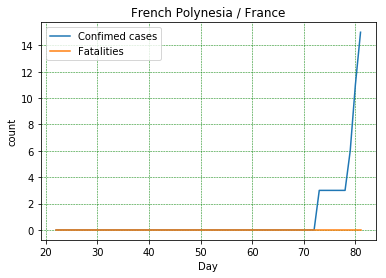

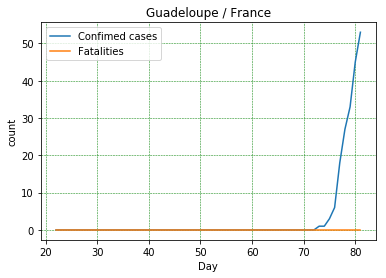

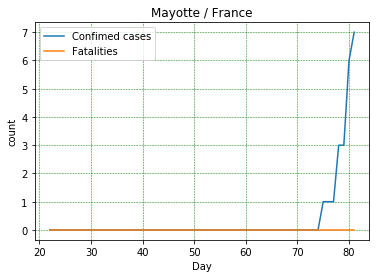

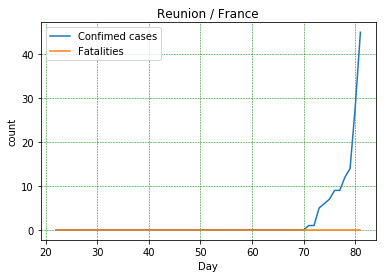

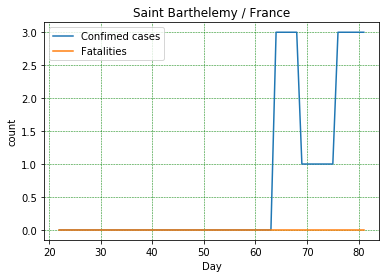

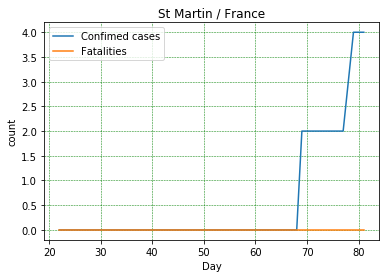

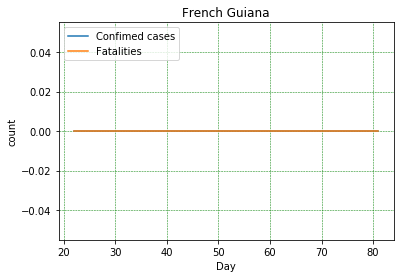

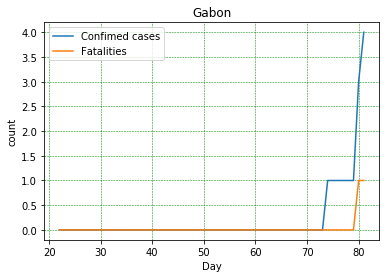

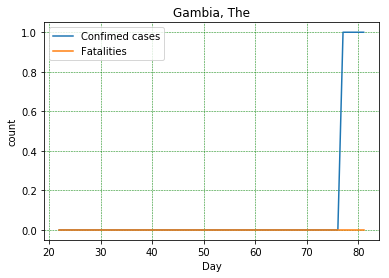

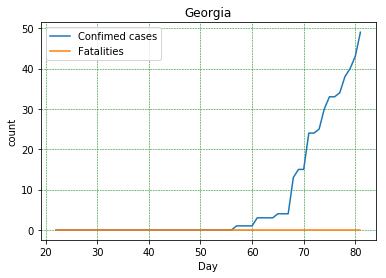

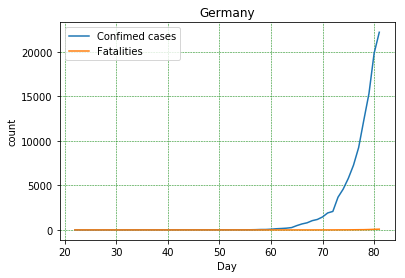

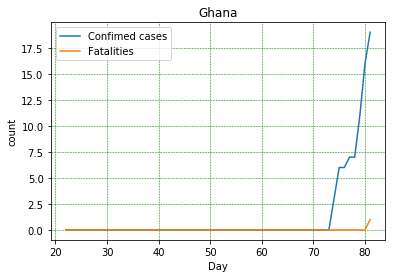

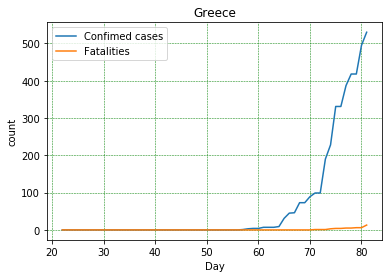

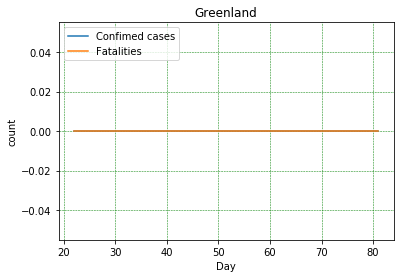

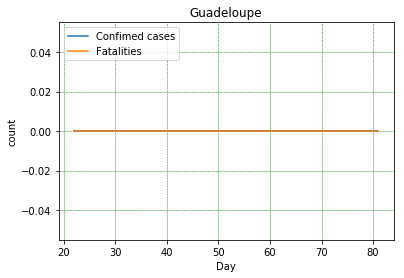

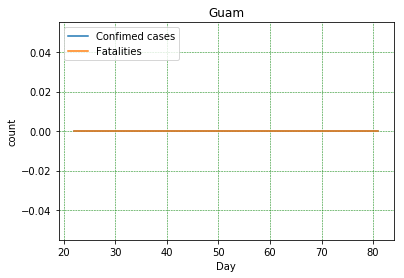

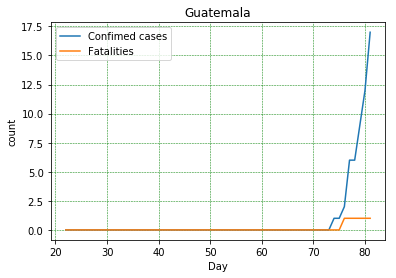

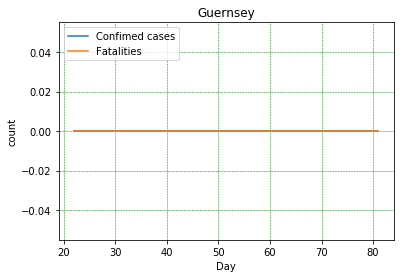

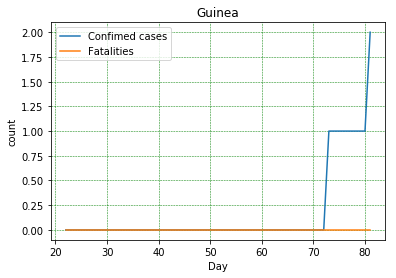

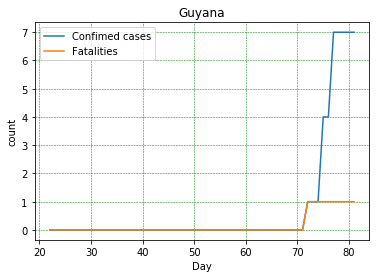

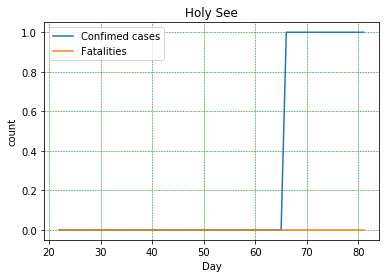

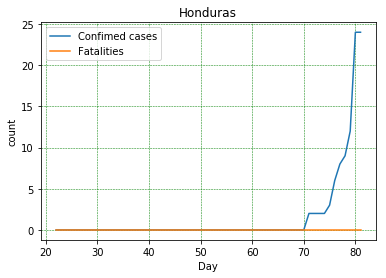

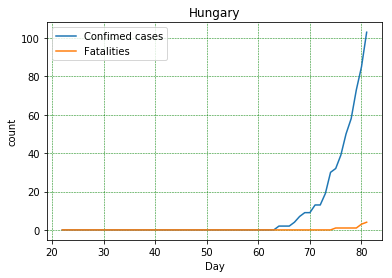

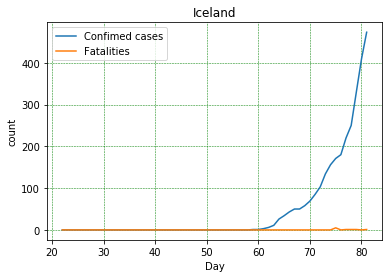

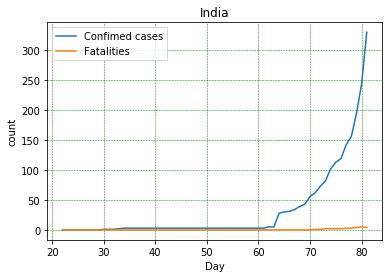

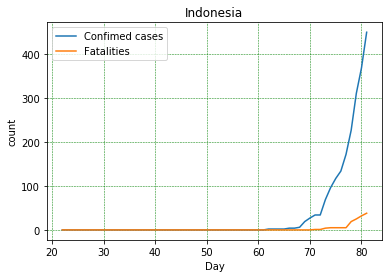

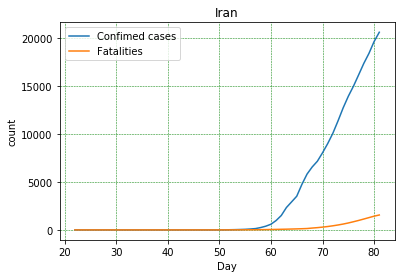

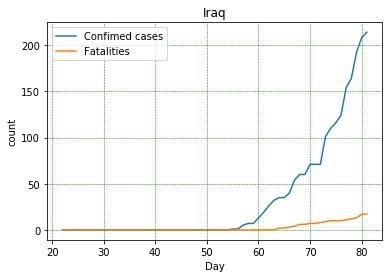

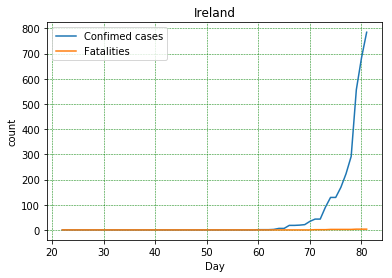

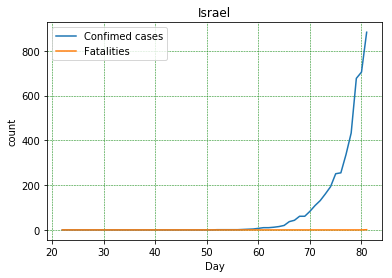

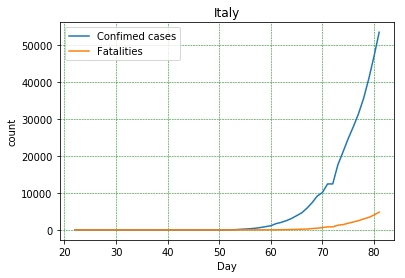

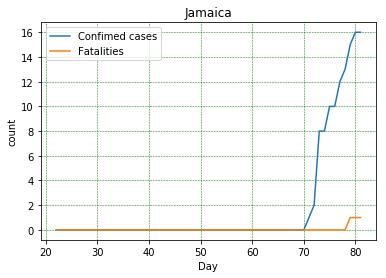

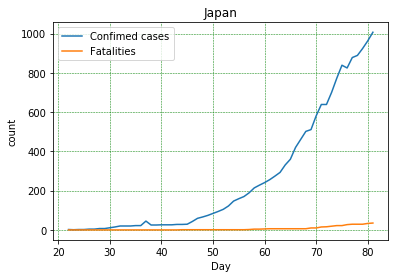

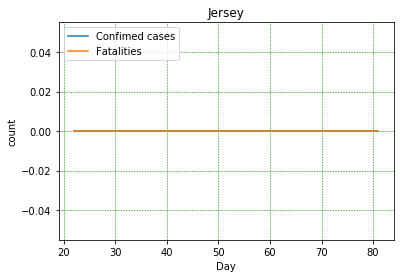

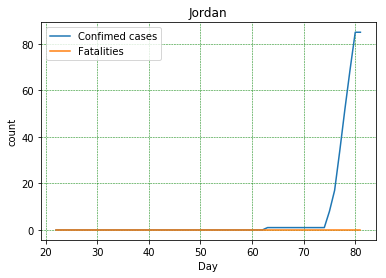

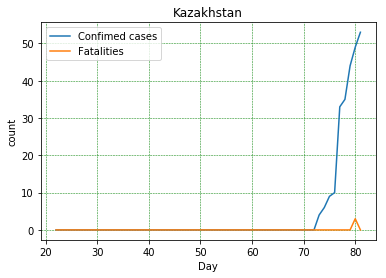

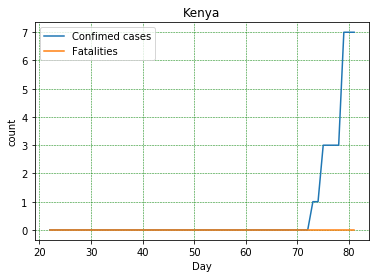

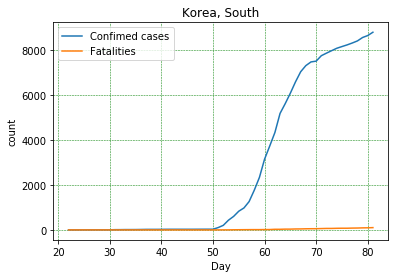

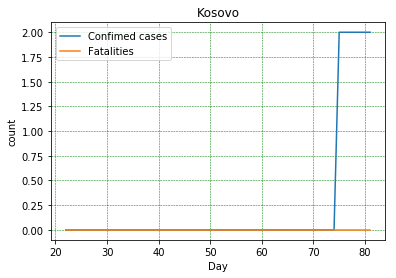

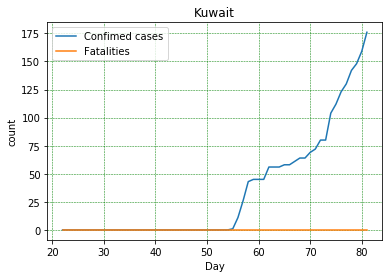

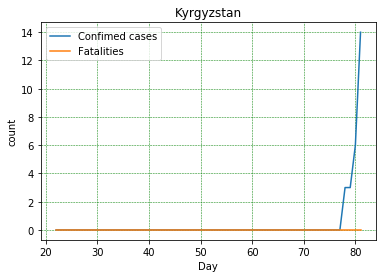

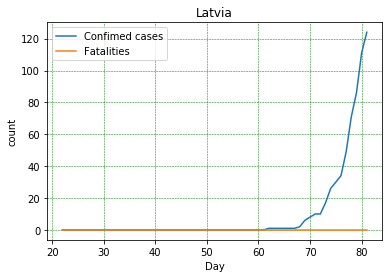

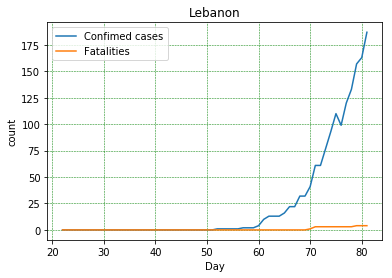

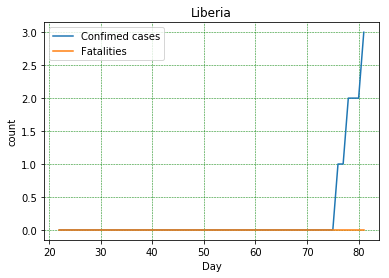

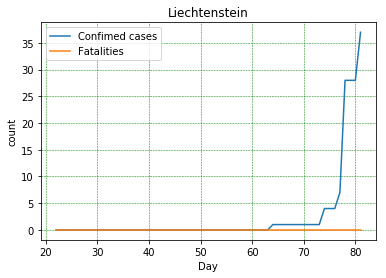

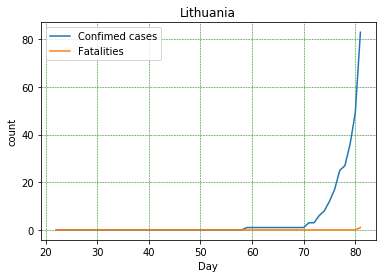

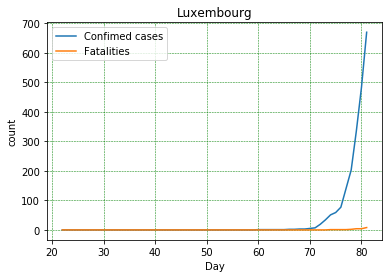

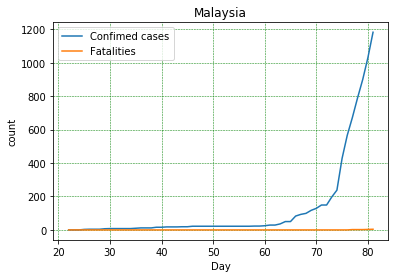

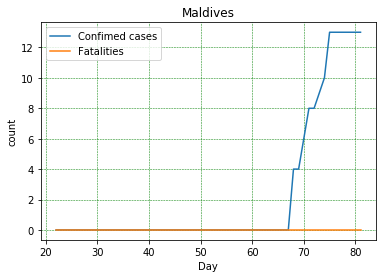

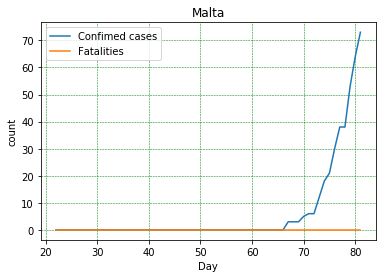

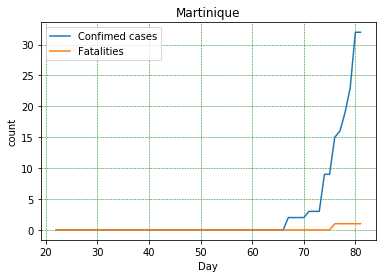

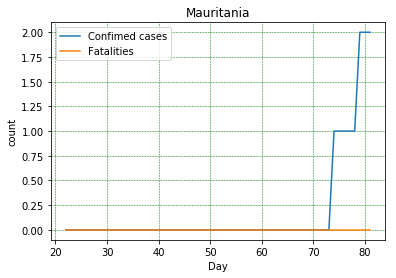

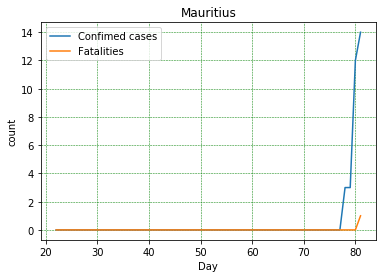

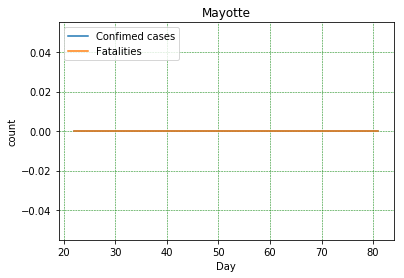

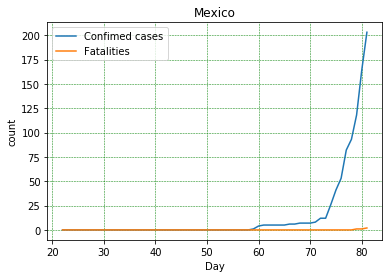

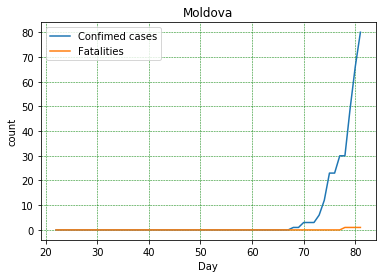

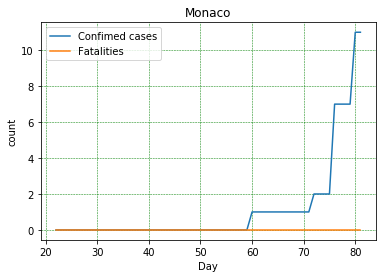

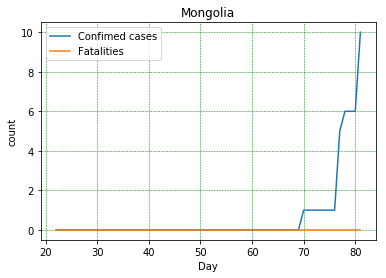

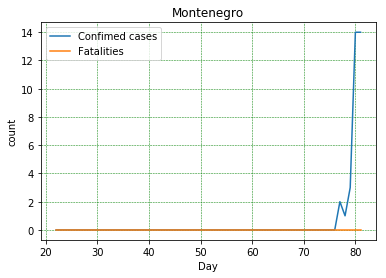

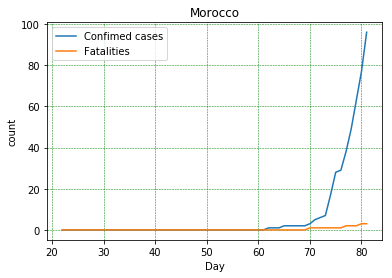

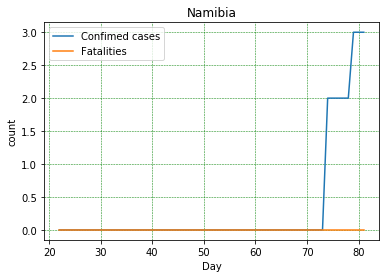

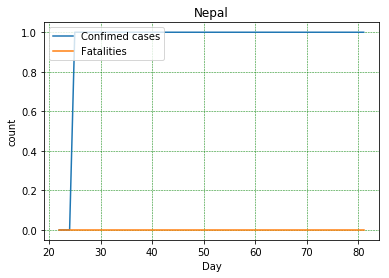

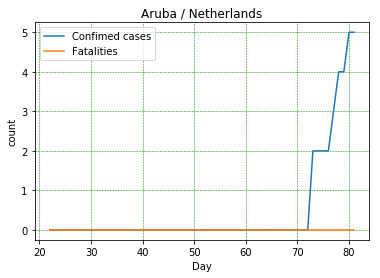

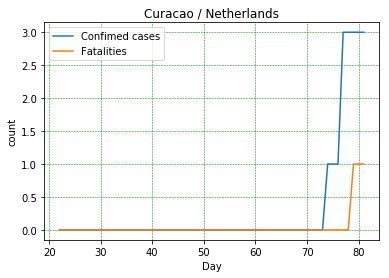

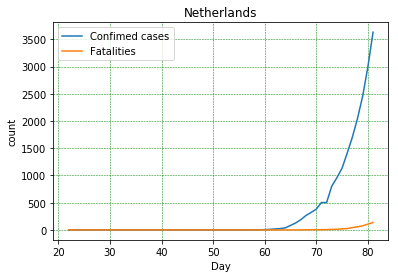

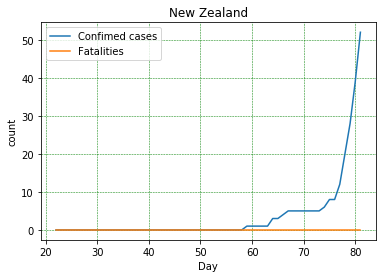

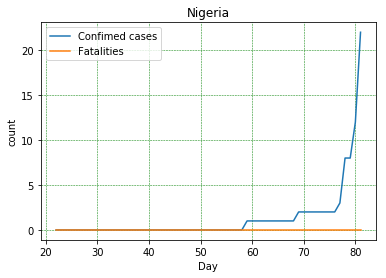

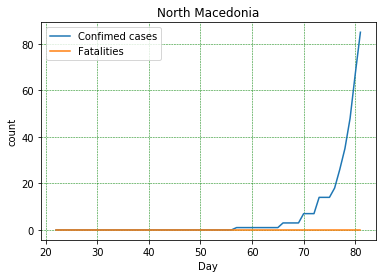

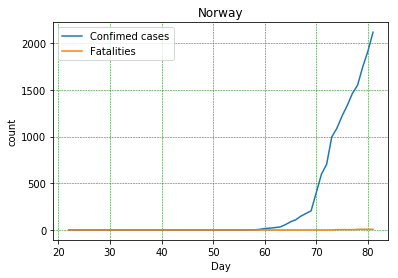

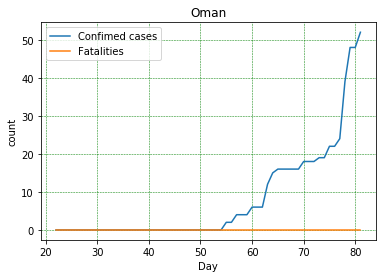

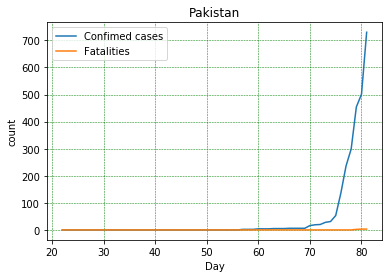

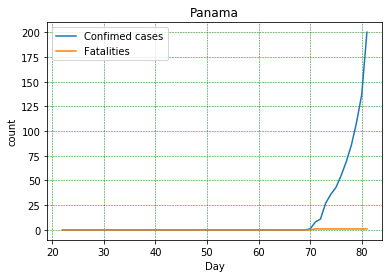

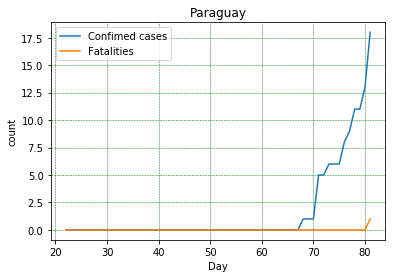

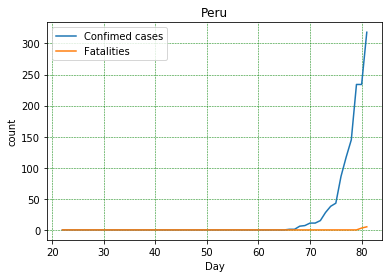

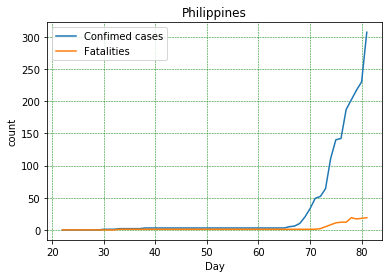

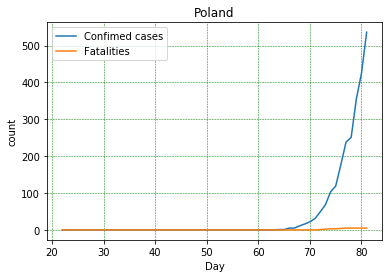

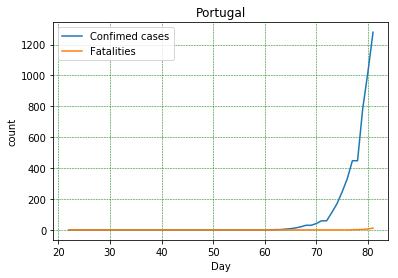

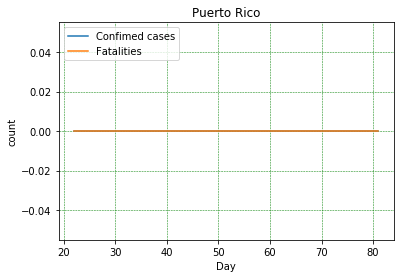

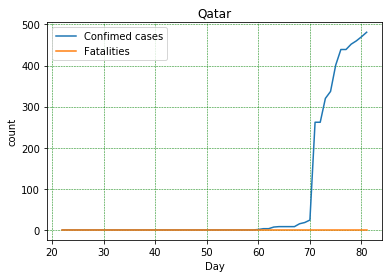

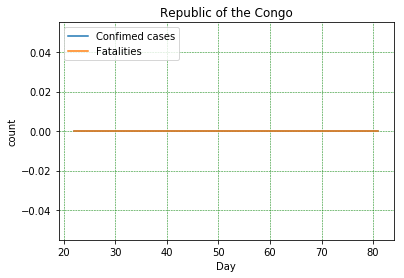

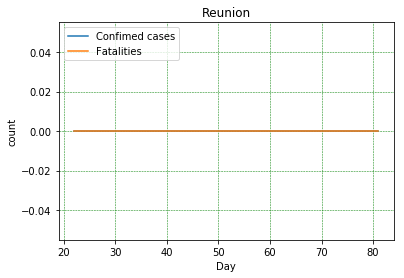

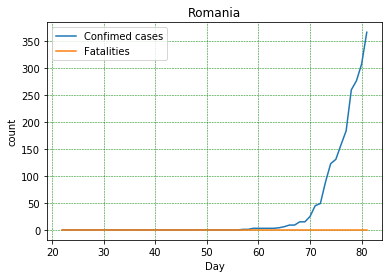

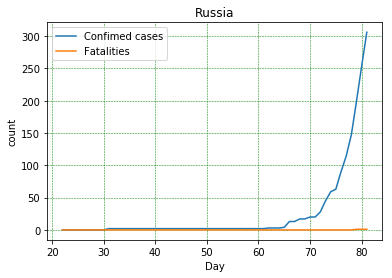

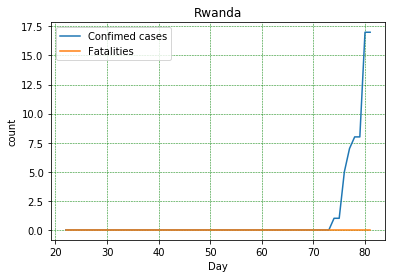

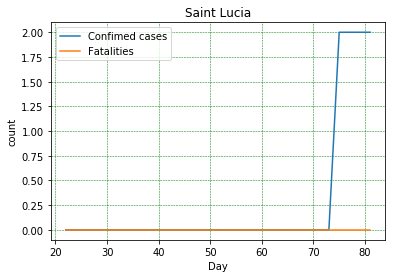

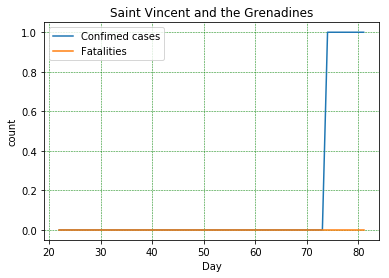

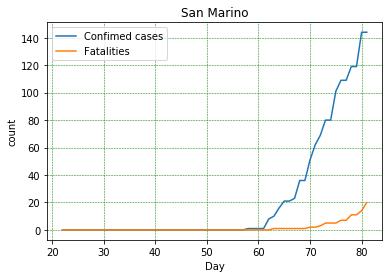

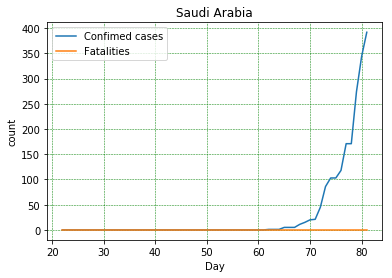

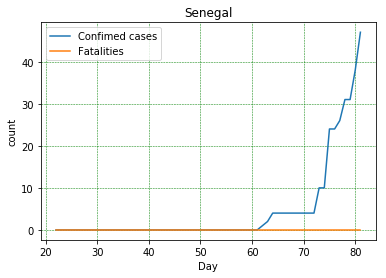

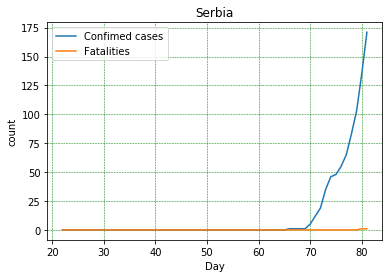

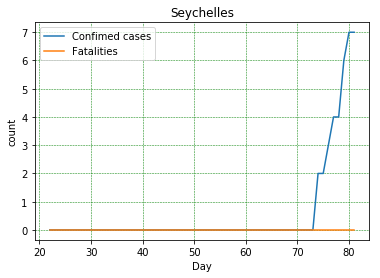

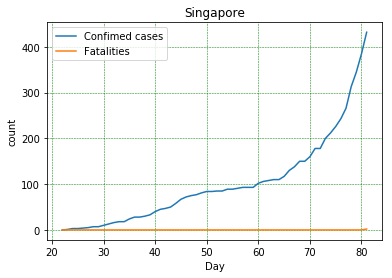

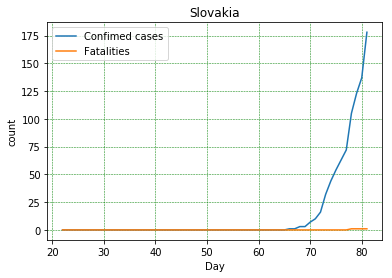

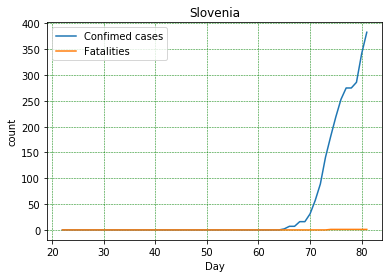

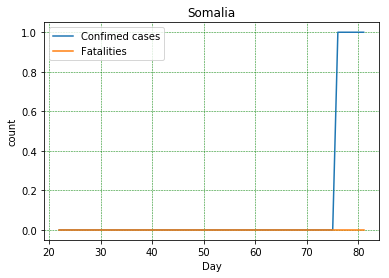

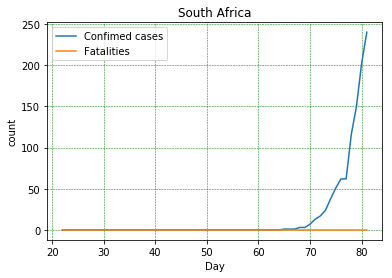

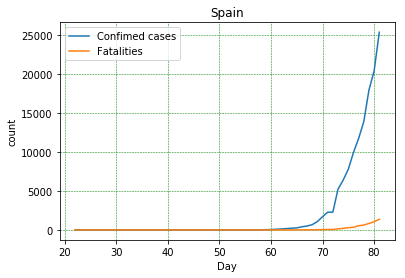

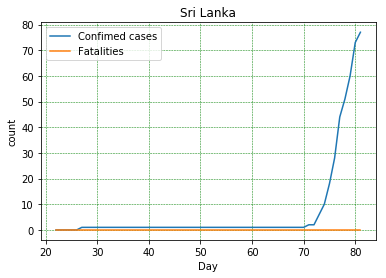

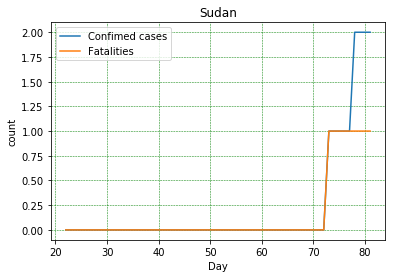

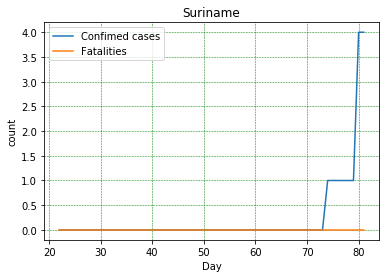

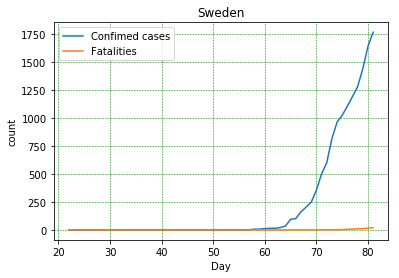

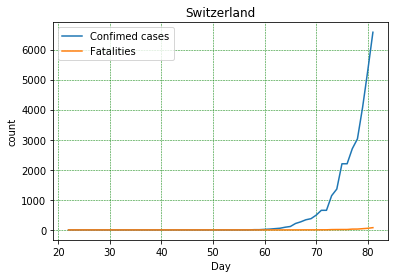

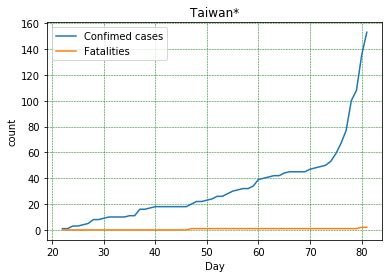

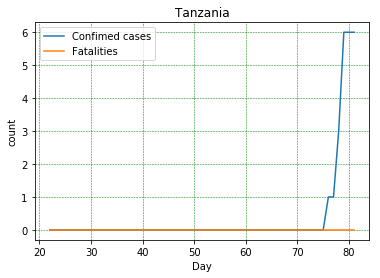

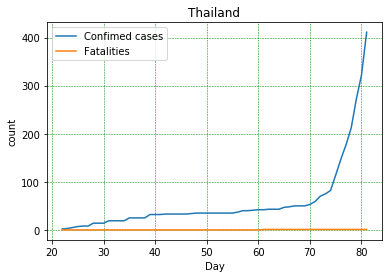

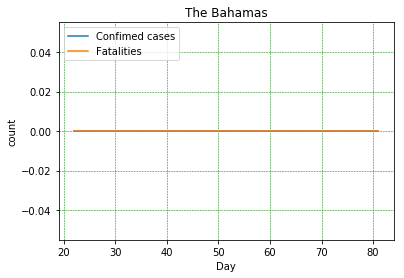

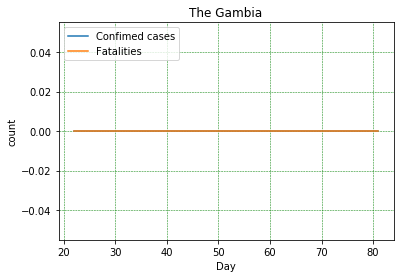

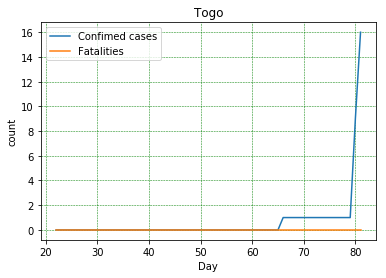

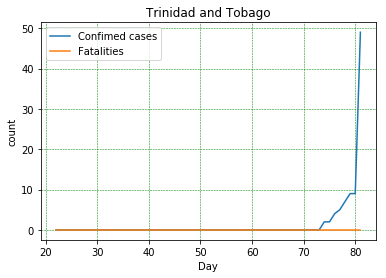

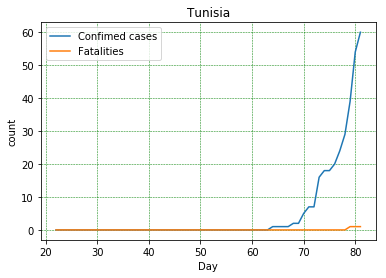

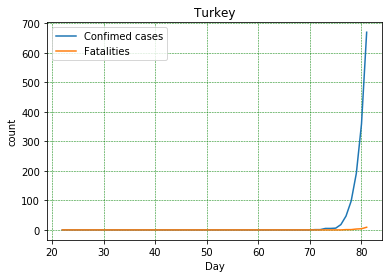

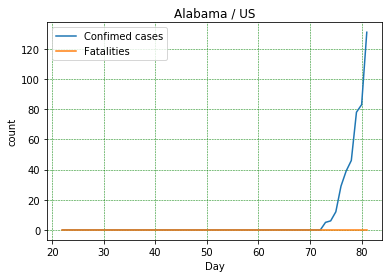

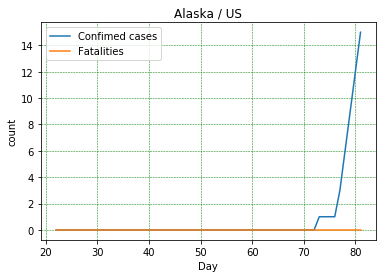

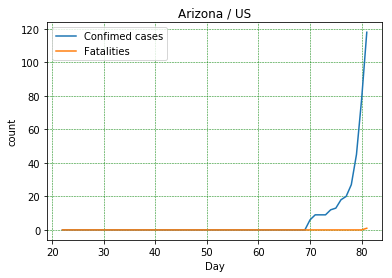

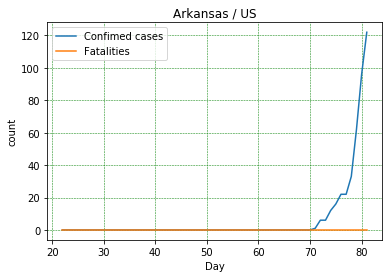

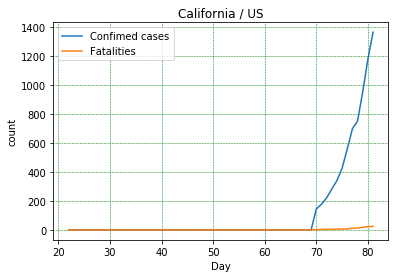

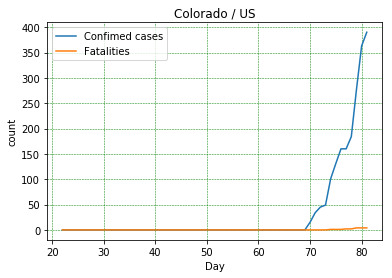

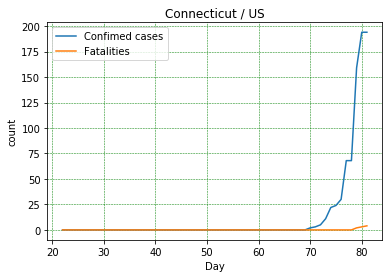

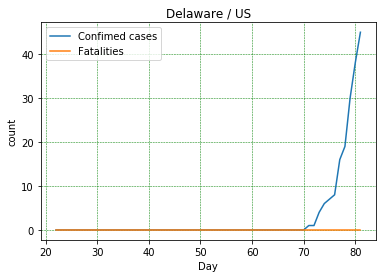

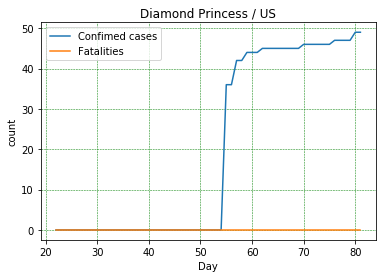

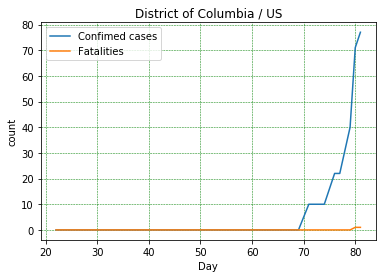

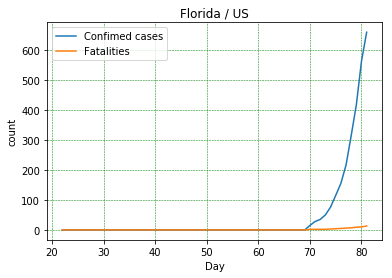

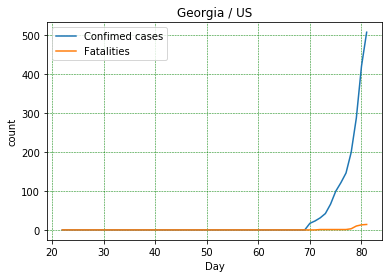

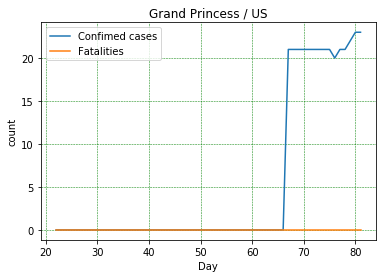

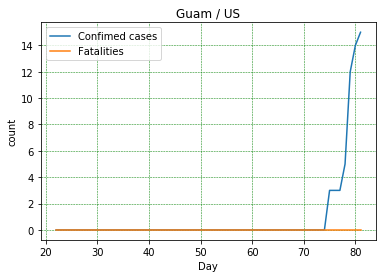

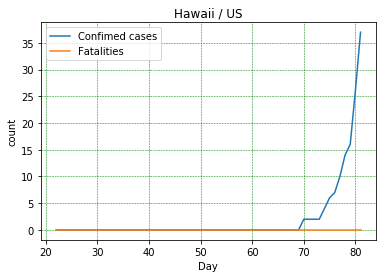

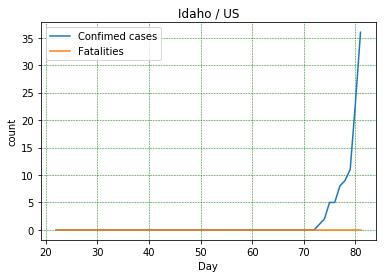

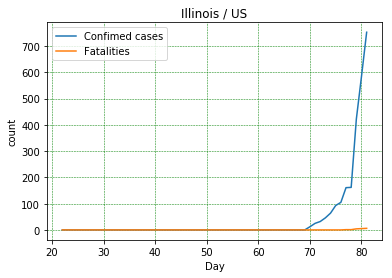

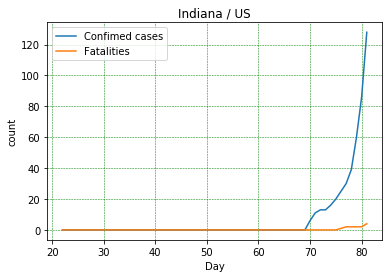

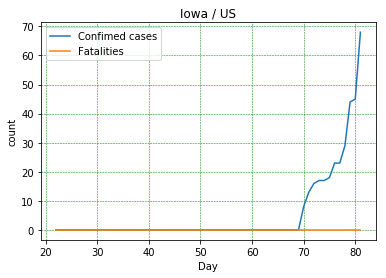

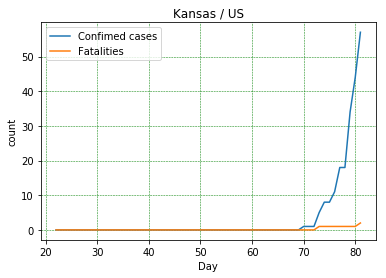

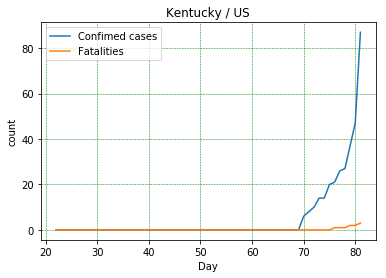

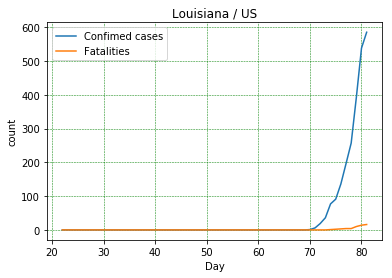

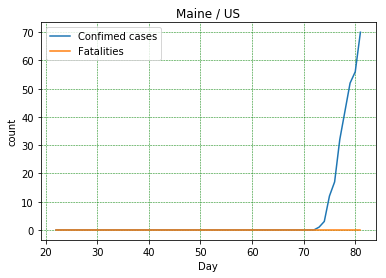

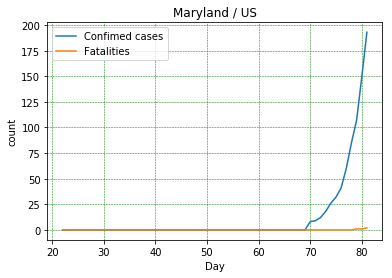

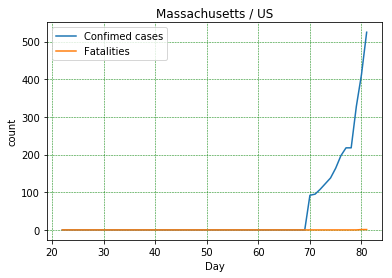

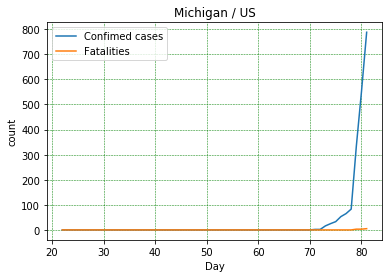

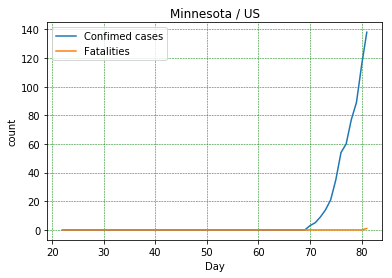

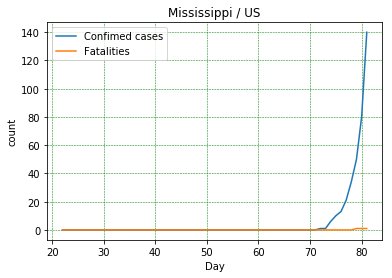

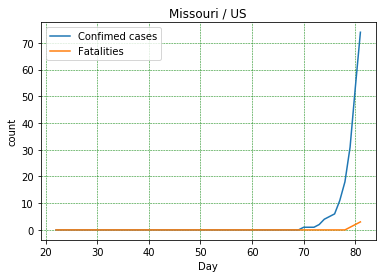

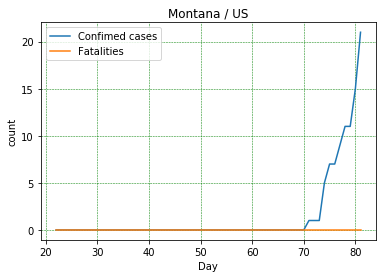

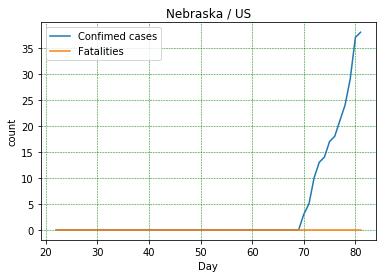

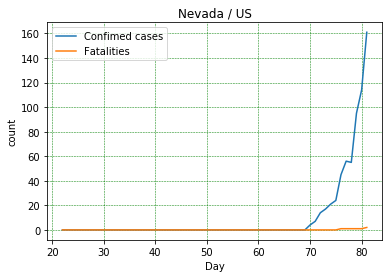

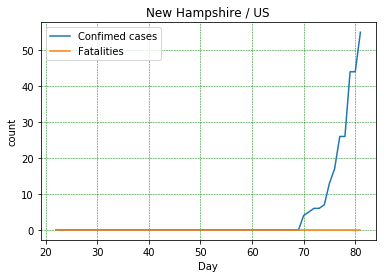

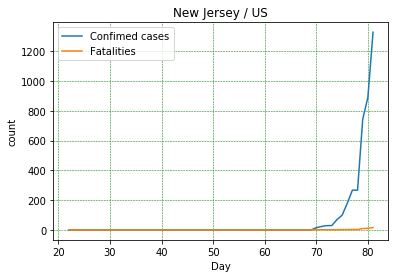

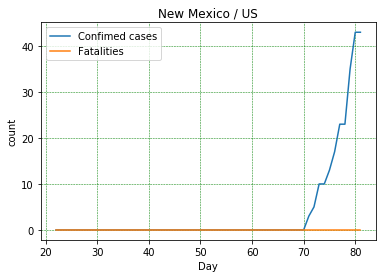

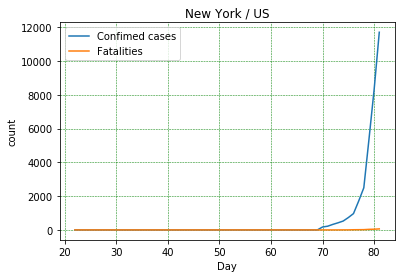

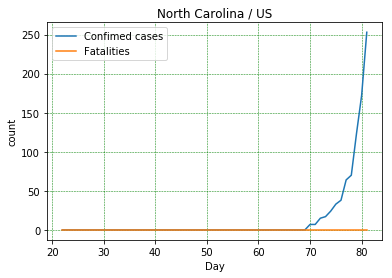

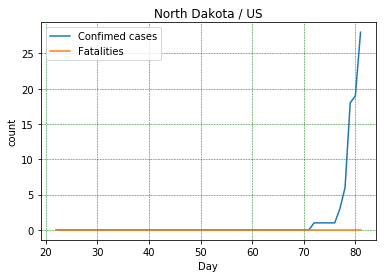

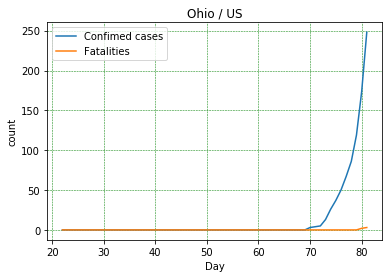

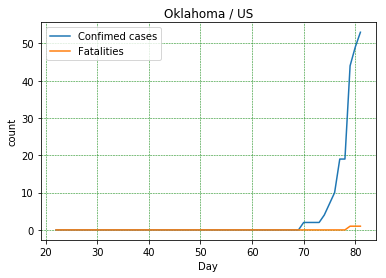

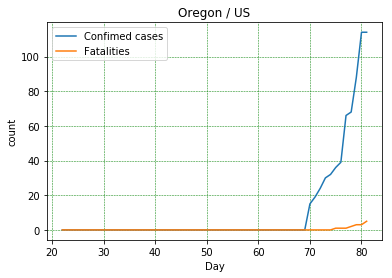

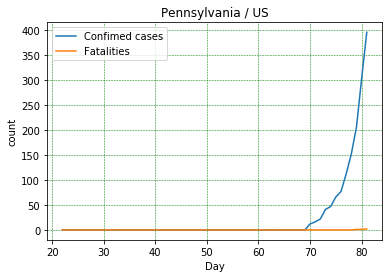

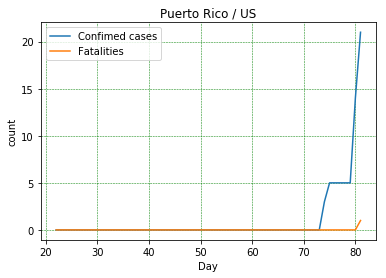

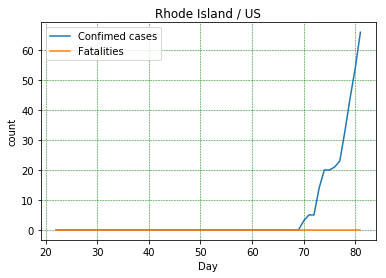

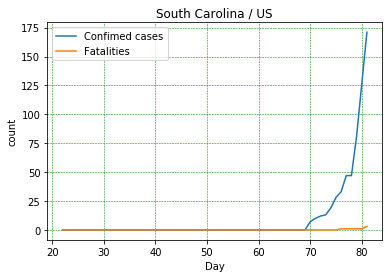

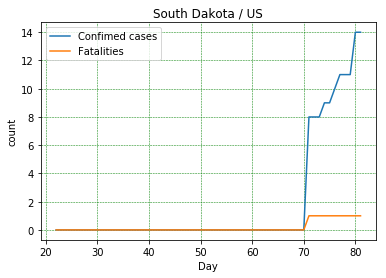

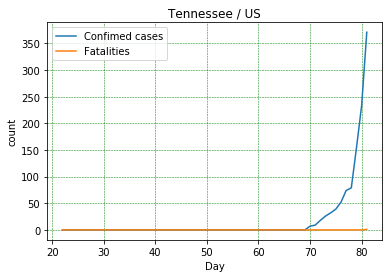

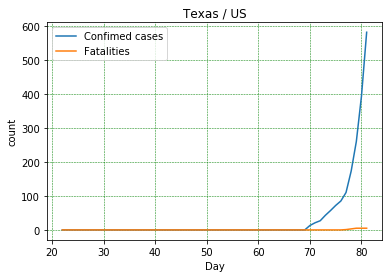

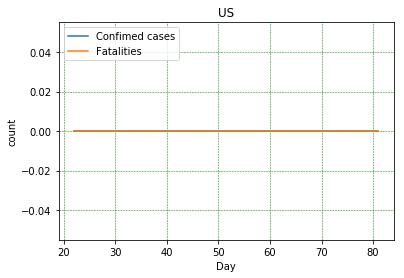

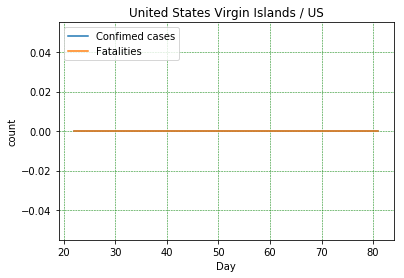

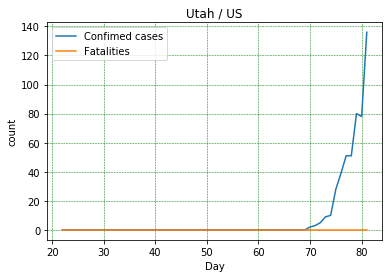

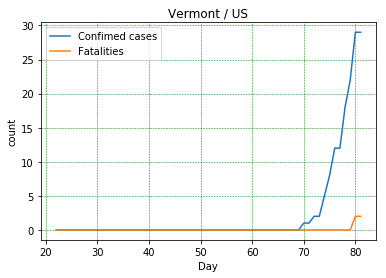

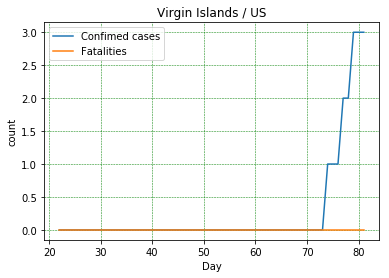

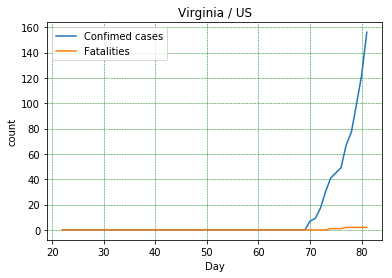

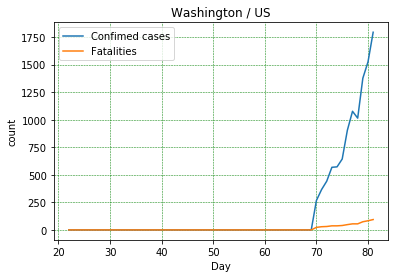

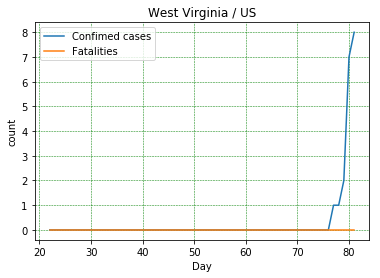

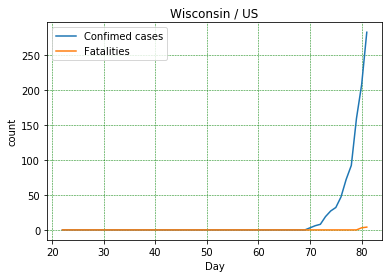

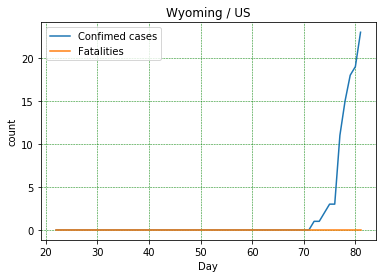

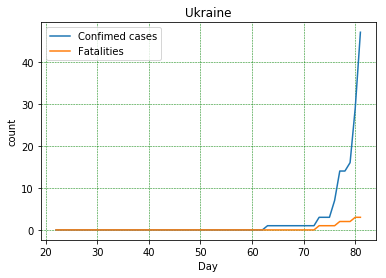

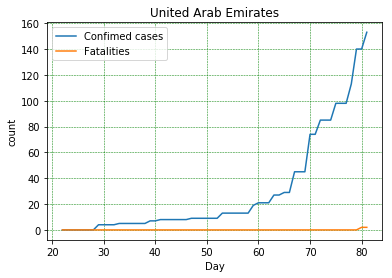

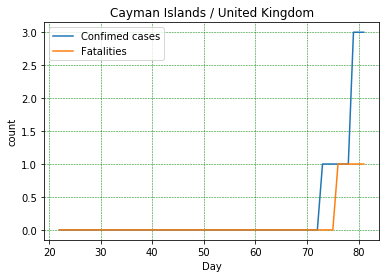

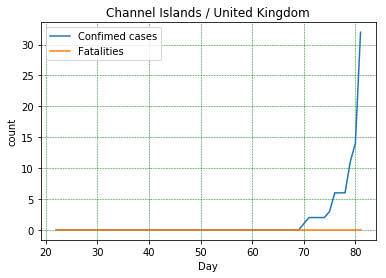

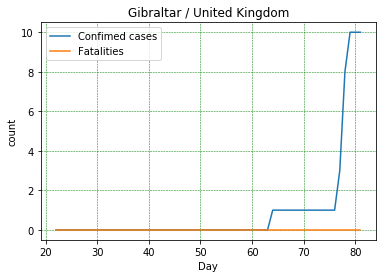

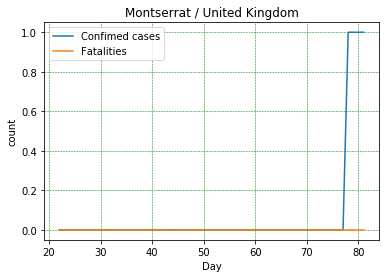

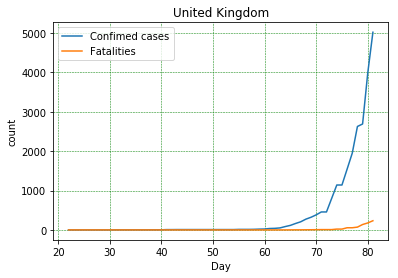

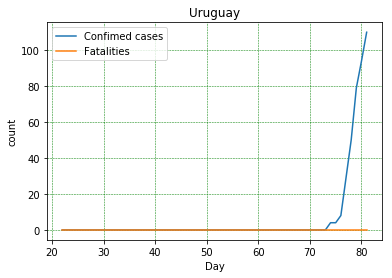

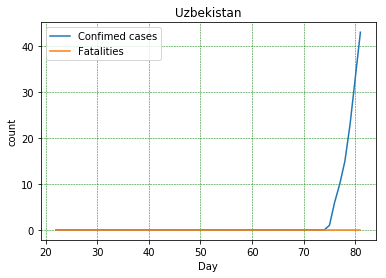

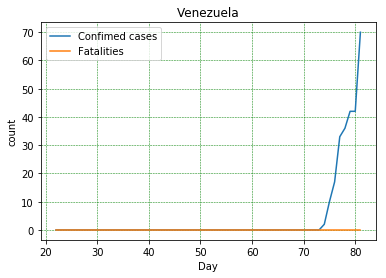

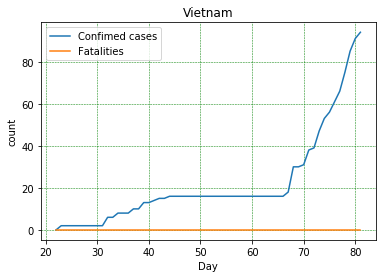

In [122]:
k=0
key = state[0]
i = 0
l = len(state)
prov_confirm = []
prov_fatal = []

while(i < l):
    if(key==state[i]):
        prov_confirm.append(confirm[i])
        prov_fatal.append(fatal[i])
        i+=1
    else:
        plt.figure(k+1)
        plt.plot(date_set, prov_confirm, label='Confimed cases', markerfacecolor = 'blue')
        plt.plot(date_set, prov_fatal, label='Fatalities', markerfacecolor = 'red')
        plt.xlabel('Day')
        plt.ylabel('count')
        plt.legend(loc='upper left')
        plt.grid(True,linewidth=0.5,color='g', linestyle='--')
    
        if(key == country[i-1]):
            plt.title(key)
        else:
            plt.title(key+' / '+country[i-1])
        plt.show()
        
        k+=1
        key = province[i]
        prov_confirm = []
        prov_fatal = []

In [135]:
CnfCaseCnty = df_train.groupby(['Country'])['ConfirmedCases','Fatalities'].sum().sort_values(by = 'ConfirmedCases',ascending = False)
CnfCaseCnty.loc[CnfCaseCnty['ConfirmedCases']>=1]


ConfirmedCases  Fatalities
Country                                                     
China                                  3368333.0    112873.0
Italy                                   379683.0     28483.0
Iran                                    209494.0     11439.0
Korea, South                            163905.0      1335.0
Spain                                   128664.0      5573.0
Germany                                 111228.0       301.0
US                                       90121.0      1330.0
France                                   86281.0      2185.0
Switzerland                              31923.0       295.0
Cruise Ship                              24804.0       173.0
United Kingdom                           23875.0       818.0
Netherlands                              19669.0       510.0
Norway                                   16009.0        39.0
Japan                                    15478.0       372.0
Belgium                                  14522.0       171.0
Austria                                  14471.0        34.0
Sweden                                   13610.0        78.0
Denmark                                  11105.0        42.0
Malaysia                                  7585.0        13.0
Canada                                    6158.0        64.0
Singapore                                 6105.0         2.0
Australia                                 6067.0        69.0
Portugal                                  5107.0        24.0
Czechia                                   4619.0         0.0
Israel                                    4508.0         1.0
Qatar                                     4426.0         0.0
Brazil                                    4003.0        36.0
Greece                                    3925.0        49.0
Thailand                                  3436.0        21.0
Bahrain                                   3423.0         6.0
...                                          ...         ...
Togo                                        39.0         0.0
Seychelles                                  35.0         0.0
Kenya                                       35.0         0.0
Montenegro                                  34.0         0.0
Mauritius                                   32.0         1.0
Kyrgyzstan                                  26.0         0.0
Equatorial Guinea                           25.0         0.0
Tanzania                                    23.0         0.0
Barbados                                    20.0         0.0
Namibia                                     19.0         0.0
Bhutan                                      18.0         0.0
Holy See                                    16.0         0.0
Saint Lucia                                 15.0         0.0
Suriname                                    14.0         0.0
Kosovo                                      14.0         0.0
Congo (Brazzaville)                         13.0         0.0
Sudan                                       13.0         9.0
Gabon                                       13.0         2.0
Central African Republic                    11.0         0.0
Mauritania                                  11.0         0.0
Liberia                                     11.0         0.0
Guinea                                      10.0         0.0
Benin                                       10.0         0.0
Antigua and Barbuda                          9.0         0.0
Zambia                                       8.0         0.0
Eswatini                                     8.0         0.0
Saint Vincent and the Grenadines             8.0         0.0
Somalia                                      6.0         0.0
Gambia, The                                  5.0         0.0
Djibouti                                     4.0         0.0

[150 rows x 2 columns]

In [143]:
Critical_Countries = CnfCaseCnty.loc[CnfCaseCnty['ConfirmedCases']>=100000]
Critical_Countries


ConfirmedCases  Fatalities
Country                                 
China              3368333.0    112873.0
Italy               379683.0     28483.0
Iran                209494.0     11439.0
Korea, South        163905.0      1335.0
Spain               128664.0      5573.0
Germany             111228.0       301.0

In [152]:
Numerator = Critical_Countries['Fatalities']
Denominator = Critical_Countries['ConfirmedCases']
Mortality_Rate = (Numerator/Denominator)*100
Mortality_Rate


Country
China           3.351005
Italy           7.501784
Iran            5.460300
Korea, South    0.814496
Spain           4.331437
Germany         0.270615
dtype: float64

In [3]:
df = pd.read_csv("covid_19_clean_complete.csv",parse_dates = ['Date'])
df.head()

Province/State Country/Region      Lat      Long       Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000 2020-01-22        2.0   
1            NaN          Japan  36.0000  138.0000 2020-01-22        2.0   
2            NaN      Singapore   1.2833  103.8333 2020-01-22        0.0   
3            NaN          Nepal  28.1667   84.2500 2020-01-22        0.0   
4            NaN       Malaysia   2.5000  112.5000 2020-01-22        0.0   

   Deaths  Recovered  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0

In [11]:
df =df.rename(columns={'Province/State':'State','Country/Region':'Country'})
df['Active_Cases'] = df['Confirmed']-(df['Recovered'] + df['Deaths'])
df.head()

State    Country      Lat      Long       Date  Confirmed  Deaths  \
0   NaN   Thailand  15.0000  101.0000 2020-01-22        2.0     0.0   
1   NaN      Japan  36.0000  138.0000 2020-01-22        2.0     0.0   
2   NaN  Singapore   1.2833  103.8333 2020-01-22        0.0     0.0   
3   NaN      Nepal  28.1667   84.2500 2020-01-22        0.0     0.0   
4   NaN   Malaysia   2.5000  112.5000 2020-01-22        0.0     0.0   

   Recovered  Active_Cases  
0        0.0           2.0  
1        0.0           2.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0